<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

#### Read the data

Load the csv file and print the first five observations.

In [17]:
df=pd.read_csv('bank_churn.csv')
df.head(5)

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,France,Female,42,2,0.000000,1,1,1
1,608,Spain,Female,41,1,83807.860000,1,0,0
2,502,France,Female,42,8,159660.800000,3,1,1
3,699,France,Female,39,1,0.000000,2,0,0
4,850,Spain,Female,43,2,125510.820000,1,1,0


In [18]:
# One Hot Encoding.

df=pd.get_dummies(data=df,columns=['Geography','Gender'],drop_first=True)

Our objective is to predict whether the customer has closed the bank account or not.

**The data definition is as follows:** <br>

**CreditScore**: Credit score of the customer 

**Geography**: Resident country of the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**NumOfYrsWithBank**: Years for which the customer has been with the bank

**Balance**: Bank balance of the customer in Euro

**NumOfProducts**: Number of bank facilities for which customer has opted

**HasCrCard**: Whether the customer has credit card or not (1 = Yes, 0 = No)

**Closed_Acc**: Whether the customer has closed the bank account or not (1 = Yes, 0 = No) (target/dependent variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the target variable imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
#Skewness
df.Closed_Acc.skew()

1.4706127402507152

<AxesSubplot:xlabel='Closed_Acc', ylabel='Density'>

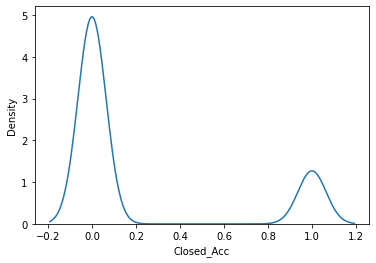

In [22]:
sns.kdeplot(df['Closed_Acc'])

# Yes,Target Variable is not normally distributed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full logistic model and calculate the odds for each variable (consider the probability  threshold as 0.25)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Closed_Acc']),df['Closed_Acc'],test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6944, 9)
(2976, 9)
(6944,)
(2976,)


In [26]:
logreg_model=sm.Logit(y_train,x_train).fit()
print(logreg_model.summary())

Optimization terminated successfully.
         Current function value: 0.454290
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Closed_Acc   No. Observations:                 6944
Model:                          Logit   Df Residuals:                     6935
Method:                           MLE   Df Model:                            8
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                  0.1015
Time:                        00:58:32   Log-Likelihood:                -3154.6
converged:                       True   LL-Null:                       -3510.8
Covariance Type:            nonrobust   LLR p-value:                1.503e-148
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0041      0.000    -18.227      0.000      -0.004      -0.004
Age     

In [29]:
pd.DataFrame(np.exp(logreg_model.params),columns=['ODDS'])

,ODDS
CreditScore,0.995948
Age,1.055597
NumOfYrsWithBank,0.964776
Balance,1.000001
NumOfProducts,0.681402
HasCrCard,0.835303
Geography_Germany,2.210672
Geography_Spain,0.917927
Gender_Male,0.519270


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Calculate the Specificity and Sensitivity from the confusion matrix of the full model (consider the probability threshold as 0.25)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
y_pred_prob=logreg_model.predict(x_test)
y_pred=[0 if x < 0.25 else 1 for x in y_pred_prob]
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[1825  277]
 [ 544  330]]


In [33]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      2102
           1       0.54      0.38      0.45       874

    accuracy                           0.72      2976
   macro avg       0.66      0.62      0.63      2976
weighted avg       0.70      0.72      0.71      2976



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a logistic model on the 6 features obtained by RFE and plot the ROC curve 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
linereg=LinearRegression()
linereg_model=sfs(estimator=linereg,k_features=6,forward=True,verbose=2,scoring='r2')
linereg_model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-07-19 01:10:09] Features: 1/6 -- score: 0.08948316596245018[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-07-19 01:10:09] Features: 2/6 -- score: 0.11555278122301518[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-07-19 01:10:09] Features: 3/6 -- score: 0.124699472040205[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

SequentialFeatureSelector(estimator=LinearRegression(), k_features=6,
                          scoring='r2', verbose=2)

In [38]:
# 6 Features for model building.

linereg_model.k_feature_names_

('CreditScore',
 'Age',
 'Balance',
 'NumOfProducts',
 'Geography_Germany',
 'Gender_Male')

In [39]:
#Building a model

x_train,x_test,y_train,y_test=train_test_split(df[['CreditScore','Age','Balance','NumOfProducts','Geography_Germany','Gender_Male']],df['Closed_Acc'],test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6944, 6)
(2976, 6)
(6944,)
(2976,)


In [60]:
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

In [41]:
logreg_model=sm.Logit(y_train,x_train).fit()
print(logreg_model.summary())

Optimization terminated successfully.
         Current function value: 0.441133
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Closed_Acc   No. Observations:                 6944
Model:                          Logit   Df Residuals:                     6937
Method:                           MLE   Df Model:                            6
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                  0.1275
Time:                        01:13:24   Log-Likelihood:                -3063.2
converged:                       True   LL-Null:                       -3510.8
Covariance Type:            nonrobust   LLR p-value:                4.181e-190
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.8399      0.276    -13.925      0.000      -4.380      -3.299
CreditSc

In [42]:
y_pred_prob=logreg_model.predict(x_test)

Text(0, 0.5, 'True positive rate (Sensitivity)')

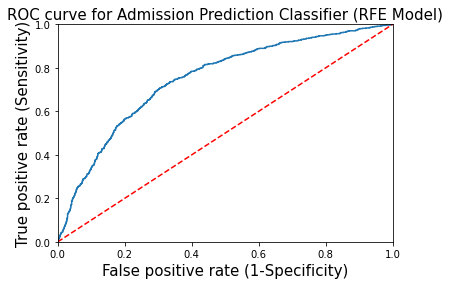

In [44]:
fpr, tpr, thresholds=roc_curve(y_test,y_pred_prob)
# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Obtain the optimal value of cut-off probability for the full model using the Youden's index 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
youden=pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresholds':thresholds})
youden['Difference']=youden.TPR-youden.FPR
youden.sort_values(by='Difference',ascending=False).head(5)

#so, Threshold value is 0.189

,FPR,TPR,Thresholds,Difference
528,0.310680,0.713344,0.189400,0.402665
522,0.304348,0.706755,0.191897,0.402407
520,0.303081,0.705107,0.192331,0.402026
524,0.306458,0.708402,0.191282,0.401944
526,0.310257,0.711697,0.189744,0.401439


In [49]:
y_pred_youdsen=[0 if x < 0.189 else 1 for x in y_pred_prob]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Consider the cut-off probability obtained from Youden's index for the full model and calculate the following measures:<br>
                    a. f-1 score <br>
                    b. Accuracy<br>
                    c. Kappa Score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
print(classification_report(y_test,y_pred_youdsen))

              precision    recall  f1-score   support

         0.0       0.90      0.69      0.78      2369
         1.0       0.37      0.71      0.49       607

    accuracy                           0.69      2976
   macro avg       0.64      0.70      0.63      2976
weighted avg       0.79      0.69      0.72      2976



In [55]:
# Kappa Score
print('Kappa:',cohen_kappa_score(y_test,y_pred_youdsen))

Kappa: 0.298630861966223


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Identify the variables involved in multicollinearity 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['Features']=df.columns
vif_new=vif[vif['VIF']<10]
vif_new.Features.values

array(['NumOfYrsWithBank', 'Balance', 'NumOfProducts', 'HasCrCard',
       'Closed_Acc', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'], dtype=object)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a logistic regression model using the categorical variables and the variables obtained after calculating VIF. Also, plot the ROC curve and compute the AUC score (consider the cut-off probability as 0.6)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
x_train,x_test,y_train,y_test=train_test_split(df[['NumOfYrsWithBank','Balance','Geography_Germany','Geography_Spain','Gender_Male']],df['Closed_Acc'],test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6944, 5)
(2976, 5)
(6944,)
(2976,)


In [62]:
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

logreg_model=sm.Logit(y_train,x_train).fit()
print(logreg_model.summary())

Optimization terminated successfully.
         Current function value: 0.483059
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Closed_Acc   No. Observations:                 6944
Model:                          Logit   Df Residuals:                     6938
Method:                           MLE   Df Model:                            5
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                 0.04456
Time:                        01:40:08   Log-Likelihood:                -3354.4
converged:                       True   LL-Null:                       -3510.8
Covariance Type:            nonrobust   LLR p-value:                 1.695e-65
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5611      0.085    -18.460      0.000      -1.727      -1.395
NumOfYrs

In [63]:
y_pred_prob=logreg_model.predict(x_test)

AUC: 0.6376692214024784


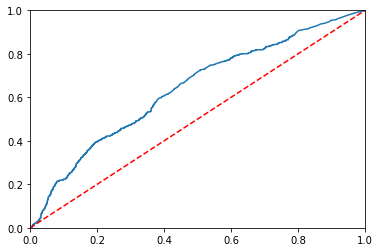

In [64]:
#Plot

fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
print('AUC:',metrics.roc_auc_score(y_test,y_pred_prob))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Consider the costs of false negatives and false positives as 2 and 0.5 respectively to obtain the optimal cut-off probability for which the total cost will be minimum
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full logistic model using the optimal cut-off probability obtained in Q9. Also, plot the confusion matrix and ROC curve along with the AUC score  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here